In [45]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

In [46]:
tickers = ["NOK", "KNEBV.HE", "FORTUM.HE", "NESTE.HE", "UPM.HE"]
metrics = ['Total Revenue', 'Gross Profit', 'Net Income']
names = ["Nokia", "Kone", "Fortum", "Neste", "UPM"]

data = {metric: pd.DataFrame() for metric in metrics}


In [47]:
for ticker in tickers:
    company = yf.Ticker(ticker)
    fin = company.financials.T
    fin = fin.loc[(fin.index >= '2021') & (fin.index <= '2025')]

    for metric in metrics:
        if metric in fin.columns:
            data[metric][ticker] = fin[metric]
        else:
            print(f"{metric} missing for {ticker}")


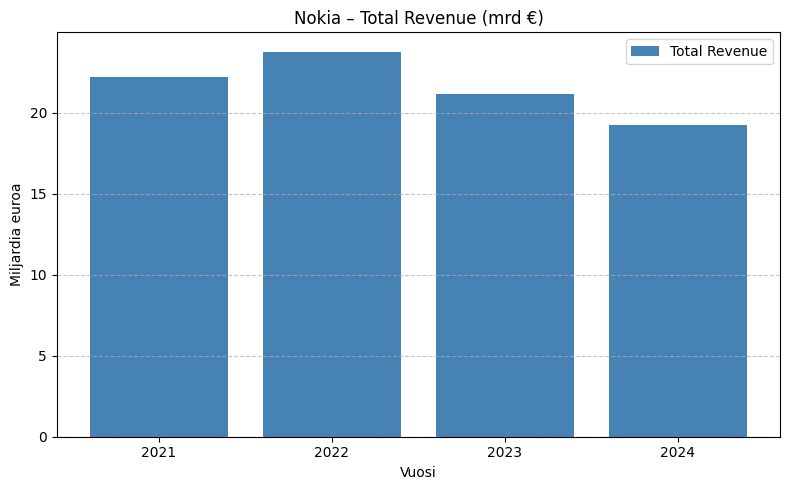

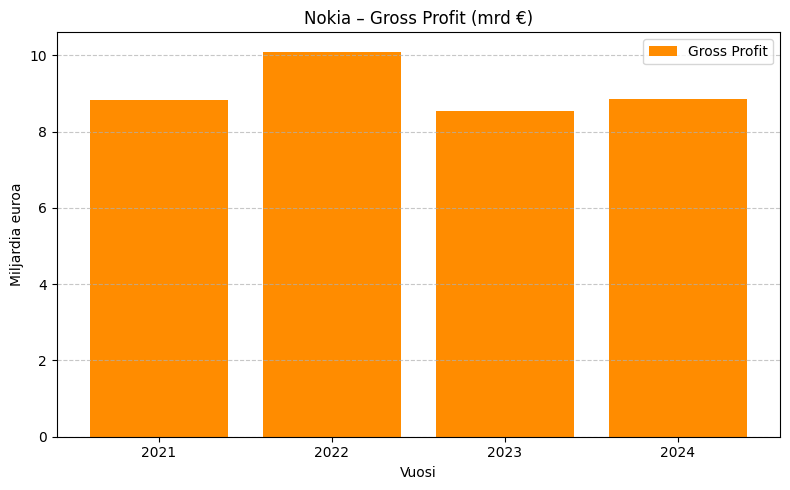

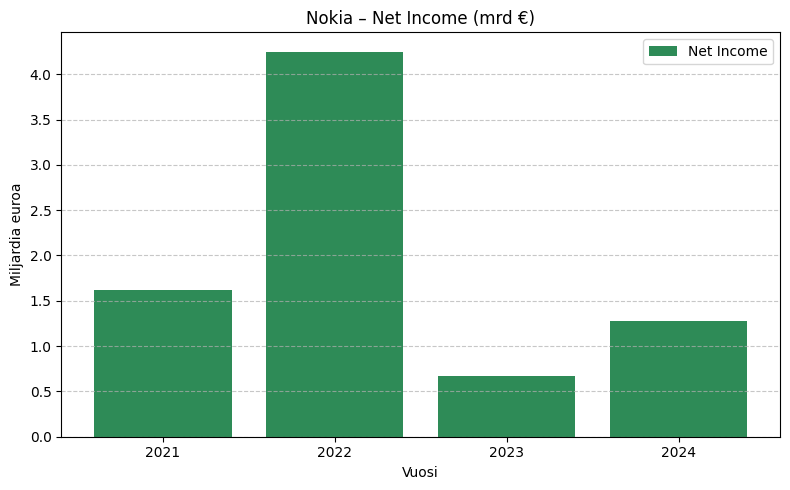

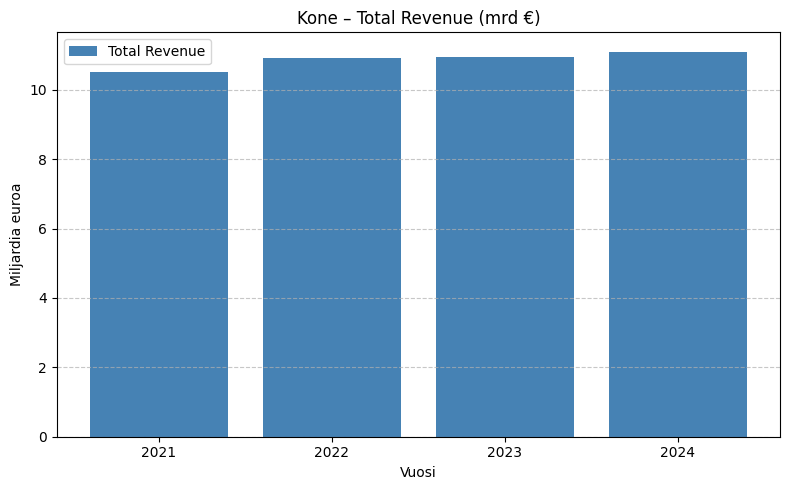

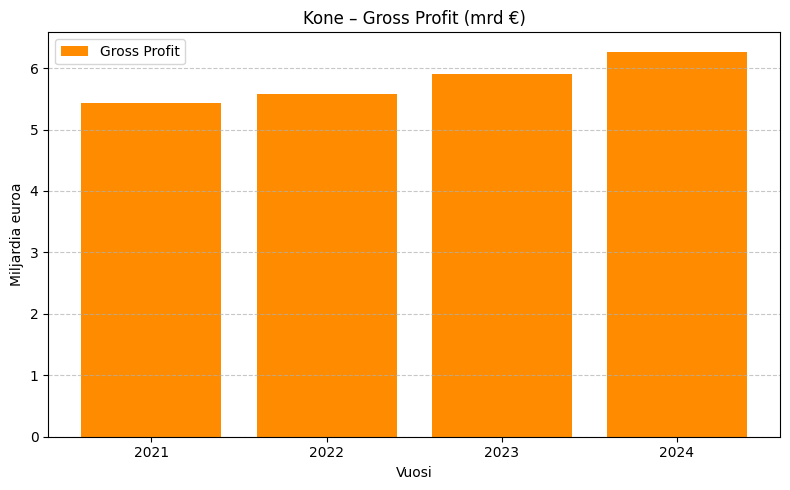

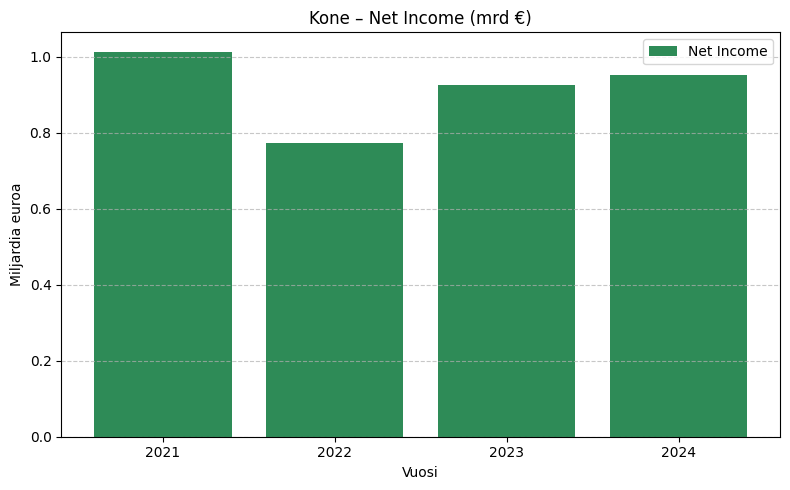

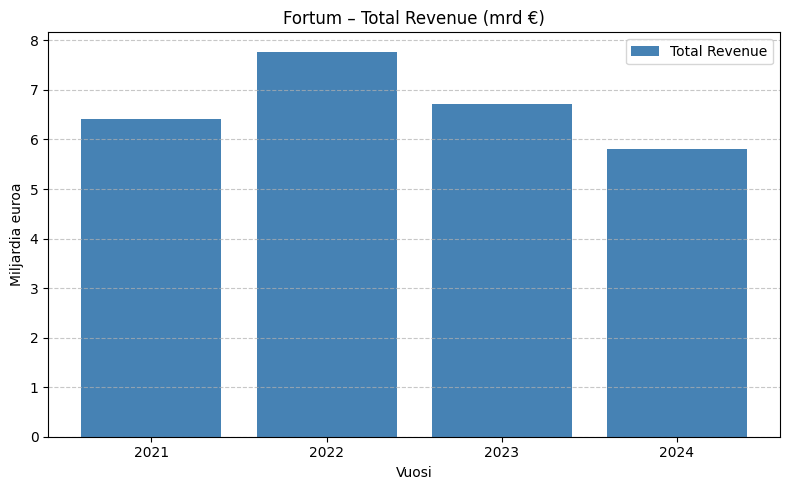

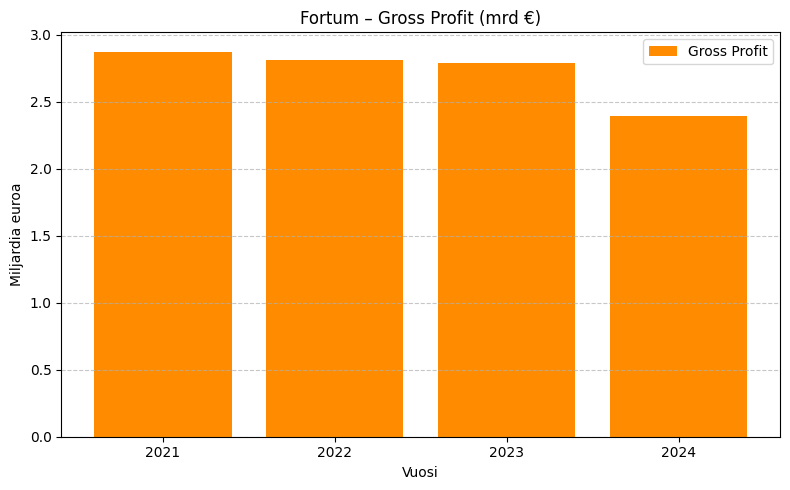

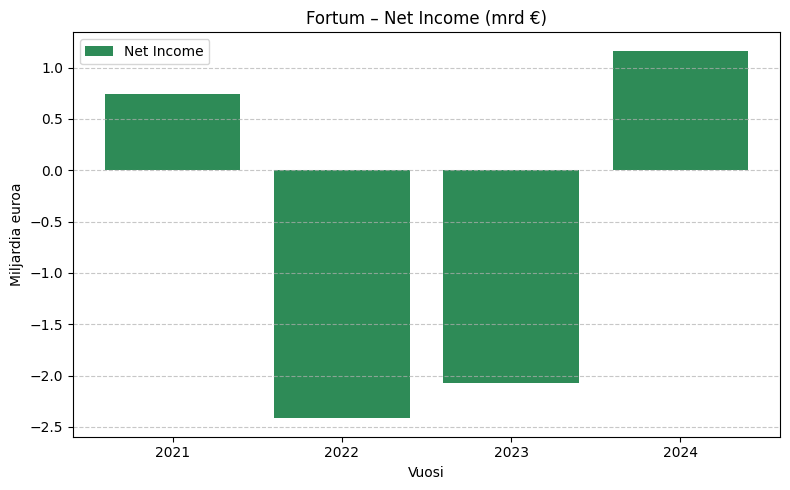

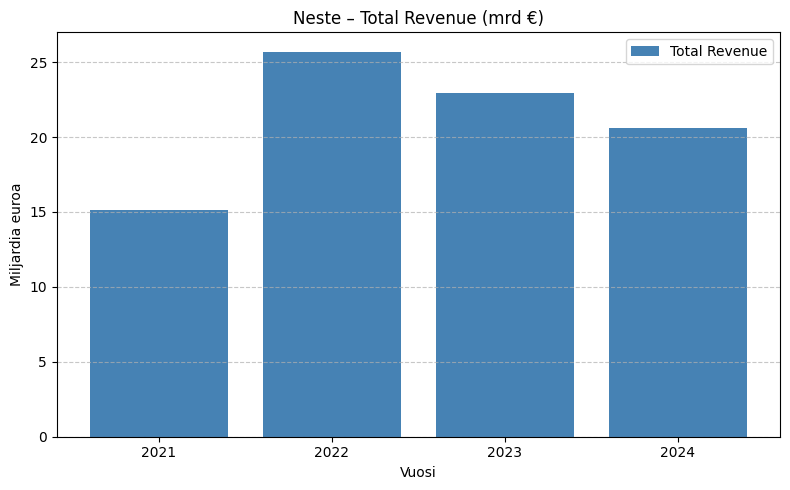

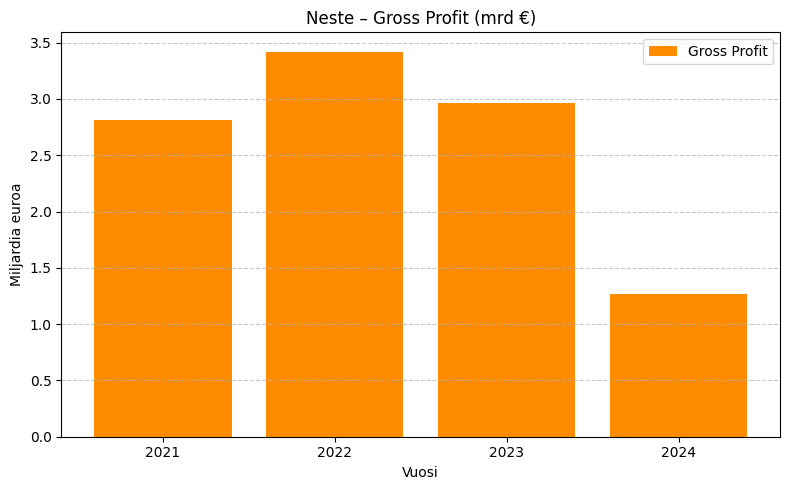

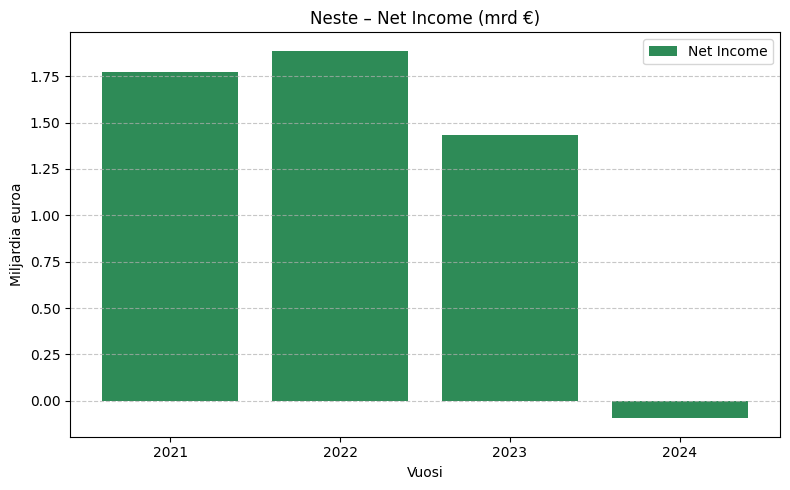

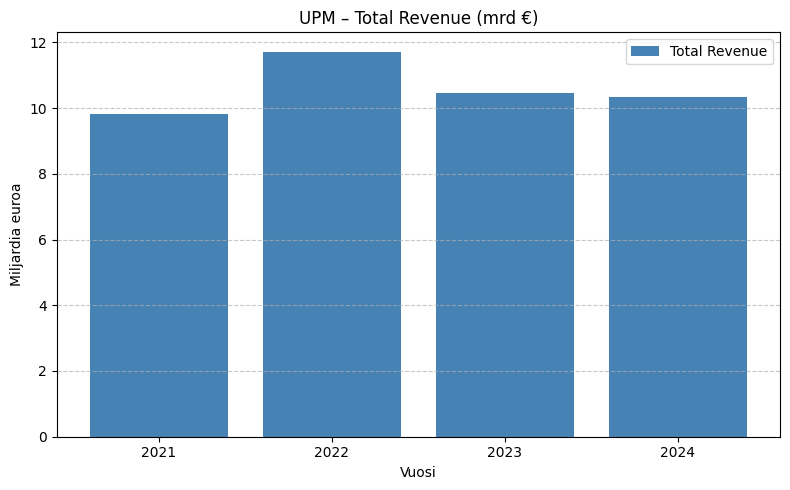

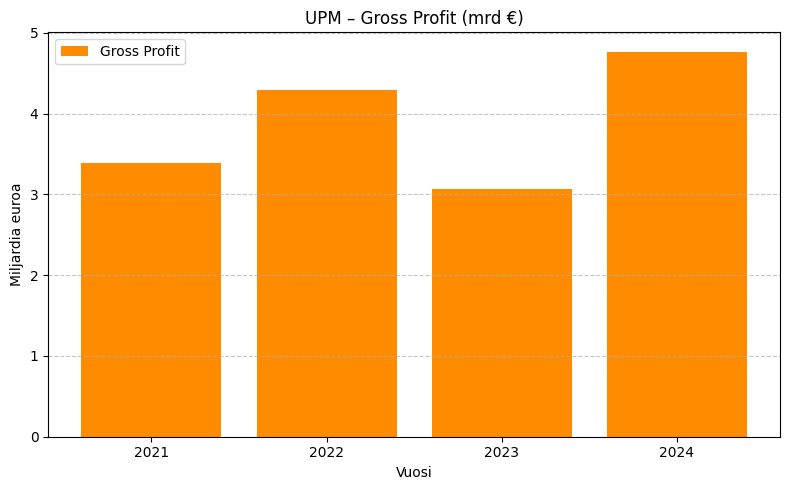

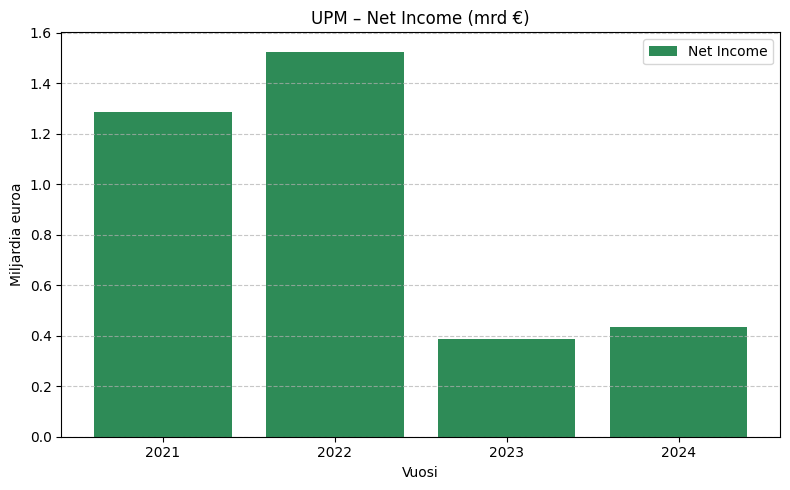

In [48]:
colors = {
    "Total Revenue": "steelblue",
    "Net Income": "seagreen",
    "Gross Profit": "darkorange"
}

for ticker, name in zip(tickers, names):
    
    for metric in metrics:
        plt.figure(figsize=(8, 5))
        df = data[metric]
        if ticker in df.columns:
            values = df[ticker].sort_index()
            years = values.index.year.astype(str)
            plt.bar(years, values / 1e9, label=metric, color=colors.get(metric))

        plt.title(f"{name} – {metric} (mrd €)")
        plt.xlabel("Vuosi")
        plt.ylabel("Miljardia euroa")
        plt.legend()
        plt.tight_layout()
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.savefig(f"graphs/{name}_{metric.replace(' ', '_')}.png")
        plt.show()
